# Processing Data for Analysis

## Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

# Before starting, let's tell jupyter not to ignore any output that is supposed to be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading in CSV Data

In [3]:
unprocessed_pd = pd.read_csv("HCDS Assignment 7 Survey UnProcessed.csv")

## Processing CSV Data
- Taking answers from question "If you are in college/university, what university? If not in college, what job/occupation are you currently doing/seeking for?"
- Convert column into a list
- Iterate over list in the following ways:
>- All different versions of the same University/College names will be made into one standard name
>- All jobs and non-University/College responses will be replaced as "Occupation"

In [4]:
#Turn column into list
university_occupation = list(unprocessed_pd["If you are in college/university, what university? If not in college, what job/occupation are you currently doing/seeking for?"])

#loop for each element in the list
for i in range(len(university_occupation)):
    #Get user inputs for that index and make all caps for easier processing
    user_input = university_occupation[i]
    user_input = user_input.upper()
    
    #Replace any typos, or inconsistencies with proper name or "Occupation"
    if "AUSTIN" in user_input:
        university_occupation[i] = "The University of Texas at Austin"
    elif "HOUSTON" in user_input:
        university_occupation[i] = "The University of Houston"
    elif "JAC" in user_input:
        university_occupation[i] = "San Jacinto College"
    elif "A&M" in user_input:
        university_occupation[i] = "Texas A&M University"
    elif "COLLEGE" not in user_input:
        university_occupation[i] = "Occupation"

## Replacing UnProcessed Column with Processed Column
- Use Panda's library to replace previous unprocessed column with processed list
- Use Panda's library to replace column names to concise one

In [53]:
#Copying dataframe to edit it in
processed_pd = unprocessed_pd

#Replacing column with list
processed_pd["If you are in college/university, what university? If not in college, what job/occupation are you currently doing/seeking for?"] = university_occupation

## Removing Timestamp column from CSV

In [54]:
processed_pd = processed_pd.drop('Timestamp', axis = 1)

## Saving Processed Data as Seperate CSV

In [55]:
processed_pd.to_csv("Processed Survey.csv")

# Performing Analysis and Graphing Data

## How many Respondents are in College

<AxesSubplot:>

Text(0.5, 0, 'Yes or No')

Text(0, 0.5, 'Number of Responses')

Text(0.5, 1.0, 'Number of Students in College')

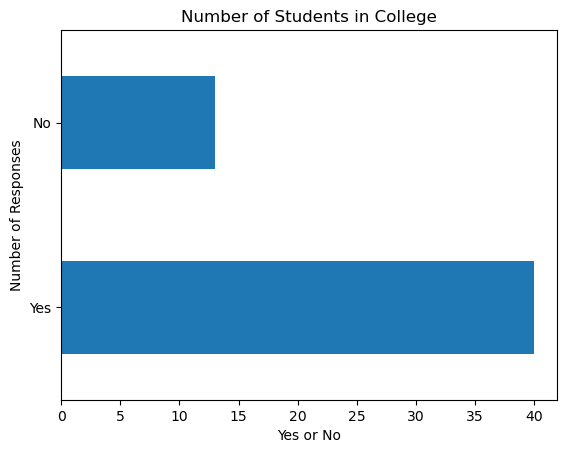

In [56]:
#Plotting Data
processed_pd["Are you currently in college or university?"].value_counts().plot(kind='barh')

#Labeling Axes
plt.xlabel("Yes or No")
plt.ylabel("Number of Responses")

#Graphing the graph a title
plt.title("Number of Students in College")

## Plotting Number of Students in Each Univeristy or if doing Occupation

<AxesSubplot:>

Text(0, 0.5, 'Colleges and Universitites')

Text(0.5, 0, 'Number of Students')

Text(0.5, 1.0, 'Colleges and Occupations')

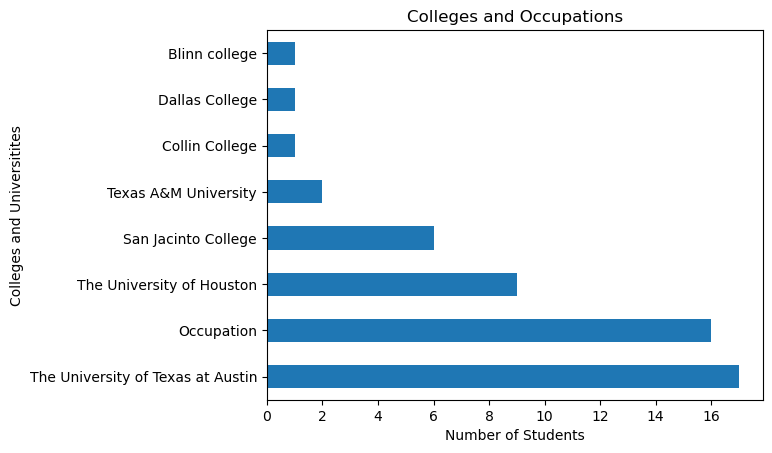

In [57]:
#Plotting Data
processed_pd["If you are in college/university, what university? If not in college, what job/occupation are you currently doing/seeking for?"].value_counts().plot(kind='barh')

#Labeling Axes
plt.ylabel("Colleges and Universitites")
plt.xlabel("Number of Students")

#Giving the graph a title
plt.title("Colleges and Occupations")

## Average Student Satisfaction after High School
- Using Boxplots to get average of students feeling of life satisfaction

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45b1b14160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45b1b14730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45b1b06e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45b1b14cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45b1b14fa0>],
 'means': []}

Text(0.5, 0, 'Satisfaction')

Text(0, 0.5, 'Satisfaction Score')

Text(0.5, 1.0, 'Average Student Life Satisfaction')

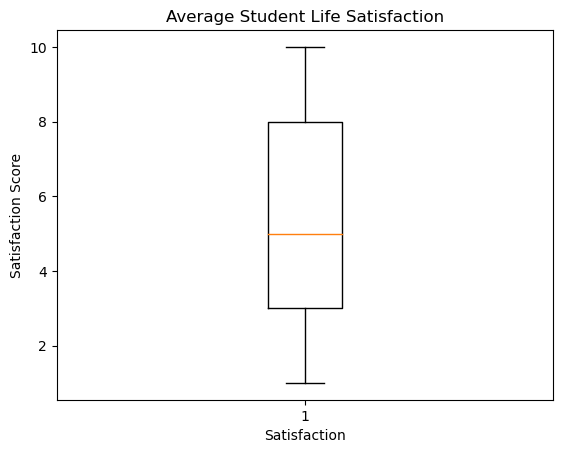

In [68]:
satisfaction = processed_pd["How satisfied are you with your current position post-graduation?"]

plt.boxplot(satisfaction)

plt.xlabel("Satisfaction")
plt.ylabel("Satisfaction Score")

plt.title("Average Student Life Satisfaction")

## Average Feelings Student Feels Toward High School Preparation
- Using Boxplots to get average of students feelings towards high school preparation

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45b1b2f640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45b1b2fbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45b1b2f370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45b1b3d1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45b1b3d490>],
 'means': []}

Text(0.5, 0, 'Preparation')

Text(0, 0.5, 'Feeling of Preparedeness')

Text(0.5, 1.0, 'Average Student Feeling of Preparation')

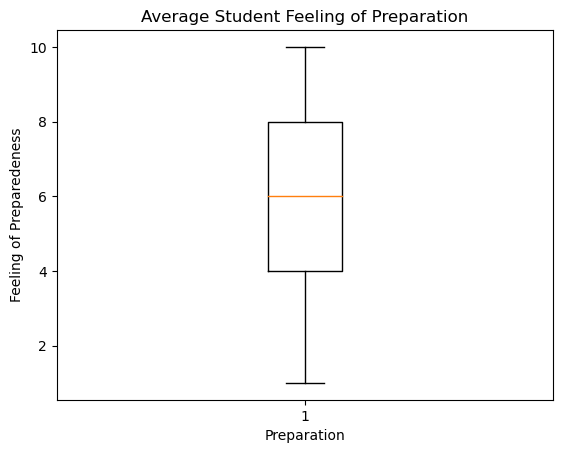

In [67]:
preparation = processed_pd["On a scale of 1-10 how much do you think high school helped prepare you for where you are now?"]

plt.boxplot(preparation)

plt.xlabel("Preparation")
plt.ylabel("Feeling of Preparedeness")

plt.title("Average Student Feeling of Preparation")